In [147]:
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import warnings

## Тема “Элементы теории вероятностей”

**Задание №1**

Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [148]:
warnings.filterwarnings("ignore")
def pause():
    programPause = input('Press the <ENTER> key to continue...')

In [23]:
redn = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]
blackn = [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]
for i in range(0, 5):
    pause()
    rn = np.random.randint(0,36)
    even_or_odd = rn % 2
    print('Рулетка крутится...')
    print(f'Цифра - {rn}')
    if rn == 0:
        print('Шарик выпал на ZERO!!!')
    if rn in redn:
        print('Шарик выпал на красное поле')
    if rn in blackn:
        print('Шарик выпал на черное поле')
    if rn != 0 and even_or_odd == 0:
        print('Шарик выпал на четное')
    if rn != 0 and even_or_odd == 1:
        print('Шарик выпал на нечетное')
    print()

Press the <ENTER> key to continue...
Рулетка крутится...
Цифра - 13
Шарик выпал на черное поле
Шарик выпал на нечетное

Press the <ENTER> key to continue...
Рулетка крутится...
Цифра - 16
Шарик выпал на красное поле
Шарик выпал на четное

Press the <ENTER> key to continue...
Рулетка крутится...
Цифра - 9
Шарик выпал на красное поле
Шарик выпал на нечетное

Press the <ENTER> key to continue...
Рулетка крутится...
Цифра - 0
Шарик выпал на ZERO!!!

Press the <ENTER> key to continue...
Рулетка крутится...
Цифра - 25
Шарик выпал на красное поле
Шарик выпал на нечетное



**Задание №2**

2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки

**КАКОВА ВЕРОЯТНОСТЬ ВЫПАДЕНИЯ ZERO 2 РАЗА ПОДРЯД?**

In [126]:
n = 10000000
zero_prev = 0
real_zero_times = 0
real_zero_times2 = 0
calc_zero_times = n * 1 / 37
calc_zero_times2 = n * (1 / 37) * (1 / 37)
for i in range(0, n):
    rn = np.random.randint(0,36)
    if rn == 0:
        real_zero_times += 1
        if zero_prev == 1:
            real_zero_times2 += 1
        zero_prev = 1
    else: 
        zero_prev = 0
print(f'Расчет: при {n} бросков шарика, ZERO должно выпасть {calc_zero_times:.0f} раз')
print(f'Эксперимент: при {n} бросков шарика, ZERO выпало {real_zero_times} раз')
print(f'Расчет: при {n} бросков шарика, ZERO должно выпасть 2 раза подряд {calc_zero_times2:.0f} раз')
print(f'Эксперимент: при {n} бросков шарика, ZERO выпало 2 раза подряд {real_zero_times2} раз')

Расчет: при 10000000 бросков шарика, ZERO должно выпасть 270270 раз
Эксперимент: при 10000000 бросков шарика, ZERO выпало 277487 раз
Расчет: при 10000000 бросков шарика, ZERO должно выпасть 2 раза подряд 7305 раз
Эксперимент: при 10000000 бросков шарика, ZERO выпало 2 раза подряд 7841 раз


**при увеличении числа экспериментов, результат будет стремится к расчетному значению**

2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9

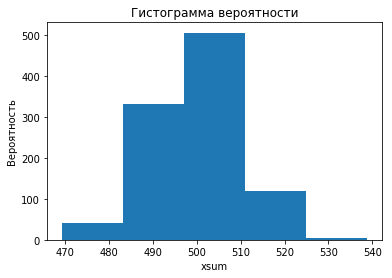

In [103]:
n = 1000
x = []
xsum = []
for i in range(0, n):
    x = np.random.rand(n)
    xsum.append(np.sum(x))
n_bins = 5
n, bins, patches = plt.hist(xsum, n_bins)
plt.xlabel('xsum')
plt.ylabel('Вероятность')
plt.title('Гистограмма вероятности')
plt.show()

**Задание №3**

3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [115]:
k, n = 0, 1000000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
print(k, n, k/n)
cnk = math.factorial(4) / (math.factorial(4 - 2) * math.factorial(2))
print(f'Биномиальный коэффициент будет = {cnk}')
print(f'Вероятность 2-х успешных экспериментов подряд будет = cnk / 2^n = {cnk / 2**4}')

375067 1000000 0.375067
Биномиальный коэффициент будет = 6.0
Тогда вероятность 2-х успешных экспериментов подряд будет = cnk / 2^n = 0.375


3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

**n = 4, k = 3**

In [131]:
k, n = 3, 4
cnk = math.factorial(n) / (math.factorial(n - k) * math.factorial(k))
print(f'Биномиальный коэффициент будет = {cnk}')
print(f'Вероятность {k} успешных экспериментов подряд будет = cnk / 2^n = {cnk / 2**n}')

Биномиальный коэффициент будет = 4.0
Вероятность 3 успешных экспериментов подряд будет = cnk / 2^n = 0.25


**Задание №4**

Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [145]:
k, n = 3, '01234'
a = []
for p in itertools.permutations(n, k):
    p = ''.join(p)
    a.append(p)
print(f'Количество возможных вариантов перестановок для n = 5 и k = 3 будет = {len(a)}')
print()
print(*a)

Количество возможных вариантов перестановок для n = 5 и k = 3 будет = 60

012 013 014 021 023 024 031 032 034 041 042 043 102 103 104 120 123 124 130 132 134 140 142 143 201 203 204 210 213 214 230 231 234 240 241 243 301 302 304 310 312 314 320 321 324 340 341 342 401 402 403 410 412 413 420 421 423 430 431 432


**Задание №5**

Дополните код расчетом коэффициента корреляции x и y по формуле
![Формула](https://lh4.googleusercontent.com/vvWkqXCHOFe1kMQAGK11czWpsabfObngrbCCbMZsLh5HkM8psheOFRq5K2XX508OlFQB7Ezy9J-NLfbfOOo_4gcNIftnGR64Qn3SFTIm8uly8eogpDEpE1bVEC4s9KAqKDvXVNsX)

0.6883422803150306 0.1602579628213833
0.6883422803150309 0.160257962821383


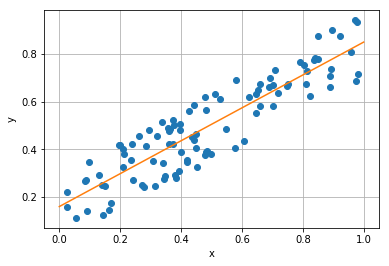

Коэффициент корреляции рассчитанный по формуле = 0.90054804
Коэффициент корреляции рассчитанный с помощью numpy = 
 [[1.         0.90054804]
 [0.90054804 1.        ]]


In [164]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]

print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

xmean = np.mean(x)
ymean = np.mean(y)

k = (np.sum((x - xmean) * (y - ymean))) / (np.sqrt(np.sum((x - xmean)**2) * np.sum((y - ymean)**2)))
k1 = np.corrcoef(x, y)

print(f'Коэффициент корреляции рассчитанный по формуле = {k:.8f}')
print(f'Коэффициент корреляции рассчитанный с помощью numpy = \n {k1}')
